# SREDJIVANJE PODATAKA

## Osnovne informacije o bazi 

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [2]:
carvana = pd.read_csv("Carvana/carvana.csv")

In [3]:
carvana.head(10)

RefId       PurchDate Auction  VehYear  VehicleAge        Make  \
0      1   1/7/2009 0:12   ADESA     2005           4       DODGE   
1      2   1/7/2009 0:12   ADESA     2004           5       DODGE   
2      3   1/7/2009 0:12   ADESA     2005           4        FORD   
3      4   1/7/2009 0:12   ADESA     2004           5  MITSUBISHI   
4      5  1/21/2009 0:12   ADESA     2004           5       DODGE   
5      6  1/25/2010 0:01   ADESA     2007           3      SUZUKI   
6      7  1/25/2010 0:01   ADESA     2006           4      SUZUKI   
7      8  1/25/2010 0:01   ADESA     2005           5       DODGE   
8      9   1/1/2010 0:02   ADESA     2005           5        FORD   
9     10   1/1/2010 0:02   ADESA     2004           6       DODGE   

                 Model Trim                  SubModel   Color Transmission  \
0           STRATUS V6  SXT          4D SEDAN SXT FFV  MAROON         AUTO   
1                 NEON  SXT                  4D SEDAN  SILVER         AUTO   
2                FOCUS  ZX3              2D COUPE ZX3  SILVER       MANUAL   
3            GALANT 4C   ES               4D SEDAN ES   WHITE         AUTO   
4  1500 RAM PICKUP 2WD   ST         QUAD CAB 4.7L SLT   WHITE         AUTO   
5              FORENZA  NaN                  4D SEDAN    GOLD         AUTO   
6              FORENZA  NaN                  4D SEDAN     RED         AUTO   
7       DURANGO 2WD V8   ST            4D SUV 4.7L ST     RED         AUTO   
8   F150 PICKUP 2WD V8  Lar  CREW CAB 5.4L KING RANCH    GREY         AUTO   
9  1500 RAM PICKUP 2WD   ST             QUAD CAB 5.7L  PURPLE         AUTO   

   WheelTypeID WheelType  VehOdo  Nationality         Size  \
0          2.0    Covers   73807     AMERICAN       MEDIUM   
1          1.0     Alloy   65617     AMERICAN      COMPACT   
2          2.0    Covers   69367     AMERICAN      COMPACT   
3          2.0    Covers   81054  OTHER ASIAN       MEDIUM   
4          1.0     Alloy   76173     AMERICAN  LARGE TRUCK   
5          2.0    Covers   35796  OTHER ASIAN       MEDIUM   
6          1.0     Alloy   72479  OTHER ASIAN       MEDIUM   
7          2.0    Covers   79957     AMERICAN   MEDIUM SUV   
8          1.0     Alloy   86702     AMERICAN  LARGE TRUCK   
9          1.0     Alloy   74026     AMERICAN  LARGE TRUCK   

  TopThreeAmericanName  MMRAcquisitionAuctionAveragePrice  \
0             CHRYSLER                             3202.0   
1             CHRYSLER                             1893.0   
2                 FORD                             3913.0   
3                OTHER                             3901.0   
4             CHRYSLER                             6407.0   
5                OTHER                             5019.0   
6                OTHER                             3620.0   
7             CHRYSLER                             6242.0   
8                 FORD                            12004.0   
9             CHRYSLER                             6964.0   

   MMRAcquisitionAuctionCleanPrice  MMRAcquisitionRetailAveragePrice  \
0                           4760.0                            6943.0   
1                           2675.0                            4658.0   
2                           5054.0                            7723.0   
3                           4908.0                            6706.0   
4                           8051.0                           10378.0   
5                           5870.0                            8484.0   
6                           4720.0                            6484.0   
7                           8058.0                           10261.0   
8                          15664.0                           17400.0   
9                           8498.0                           10836.0   

   MMRAcquisitonRetailCleanPrice  MMRCurrentAuctionAveragePrice  \
0                         8457.0                         4035.0   
1                         5690.0                         1844.0   
2                         8707.0   

In [8]:
carvana.shape

(6798, 34)

Izbacimo PRIMEUNIT, AUCGUART, VNST, Auction zbog velikog broja n/a vrednosti:

In [283]:
carvana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6798 entries, 0 to 6797
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              6798 non-null   int64  
 1   PurchDate                          6798 non-null   object 
 2   Auction                            2983 non-null   object 
 3   VehYear                            6798 non-null   int64  
 4   VehicleAge                         6798 non-null   int64  
 5   Make                               6798 non-null   object 
 6   Model                              6798 non-null   object 
 7   Trim                               6566 non-null   object 
 8   SubModel                           6798 non-null   object 
 9   Color                              6798 non-null   object 
 10  Transmission                       6798 non-null   object 
 11  WheelTypeID                        6515 non-null   float

In [284]:
carvana = carvana.drop(["PRIMEUNIT", "AUCGUART", "VNST", "Auction"], axis = 1)

Osnovne informacije o bazi:

In [285]:
carvana.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6798 entries, 0 to 6797
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              6798 non-null   int64  
 1   PurchDate                          6798 non-null   object 
 2   VehYear                            6798 non-null   int64  
 3   VehicleAge                         6798 non-null   int64  
 4   Make                               6798 non-null   object 
 5   Model                              6798 non-null   object 
 6   Trim                               6566 non-null   object 
 7   SubModel                           6798 non-null   object 
 8   Color                              6798 non-null   object 
 9   Transmission                       6798 non-null   object 
 10  WheelTypeID                        6515 non-null   float64
 11  WheelType                          6459 non-null   objec

Izvlacimo godinu iz PurchDate, kako bi sacuvali bar nesto od PurchDate, jer nam on u ovom formatu nista ne znaci:

In [286]:
carvana['PurchYear'] = pd.DatetimeIndex(carvana['PurchDate']).year
del carvana["PurchDate"]

Izbacujemo RefId jer je taj atribut jedinstven na nivou svake opservacije:

In [287]:
carvana = carvana.drop(["RefId"], axis = 1)

Proveravamo raspodelu po kategorijama za Transimission:

In [288]:
carvana['Transmission'].value_counts()

AUTO      6547
MANUAL     251
Name: Transmission, dtype: int64

In [289]:
carvana['WheelTypeID'].value_counts()

1.0    3376
2.0    3083
3.0      56
Name: WheelTypeID, dtype: int64

In [290]:
carvana['WheelType'].value_counts()

Alloy     3376
Covers    3083
Name: WheelType, dtype: int64

WheeleTypeID i WheelType objasnjavaju jednu istu informaciju, te cemo ukloniti jednu. Biramo da to bude WheeleTypeID, jer ima odredjenih gresaka u podacima, koje kod WheelType ne postoje:

In [291]:
carvana = carvana.drop(["WheelTypeID"], axis = 1)

Proveravamo raspodelu po kategorijama kod Size:

In [292]:
carvana['Size'].value_counts()

MEDIUM         2888
LARGE           786
MEDIUM SUV      760
COMPACT         629
VAN             550
LARGE TRUCK     323
SMALL SUV       221
CROSSOVER       174
SPECIALTY       169
LARGE SUV       134
SMALL TRUCK      90
SPORTS           73
Name: Size, dtype: int64

Proveravamo raspodelu po kategorijama kod TopThreeAmericanName:

In [293]:
carvana['TopThreeAmericanName'].value_counts()

GM          2328
CHRYSLER    2164
OTHER       1158
FORD        1147
Name: TopThreeAmericanName, dtype: int64

Izbacujemo BYRNO:

Izbacujemo BYRNO jer je to broj koji se dodeljuje svakom individualnom kupcu, te je model izgradjen sa njim podlozan overfitu:

In [294]:
carvana = carvana.drop(["BYRNO"], axis = 1)


Proveravamo jedinstvene vrednosti VNZIP1:

In [295]:
carvana['VNZIP1'].value_counts()

32824    339
27542    319
75236    226
74135    214
80022    205
        ... 
70002      1
38128      1
77301      1
68138      1
43207      1
Name: VNZIP1, Length: 143, dtype: int64

Izbacujemo VNZIP1, zato sto ima mnogo postanskih brojeva gde je kupljen samo 1 auto, a manji broj grupa sa vise automobila na istoj adresi, pa smatramo da bi model sa ovim atributom bio podlozan overfitu

In [296]:
carvana = carvana.drop(["VNZIP1"], axis = 1)

Proveravamo raspodelu po kategorijama varijable IsOnlineSale (veliki disbalans klasa):

In [297]:
carvana['IsOnlineSale'].value_counts()

0    6614
1     184
Name: IsOnlineSale, dtype: int64

## Dopuna n/a vrednosti

N/A vrednosti kod kategorijskih varijabli cemo menjati modusom (kategorijom koja se u statistickom skupu najvise pojavljuje), a kod numerickih cemo N/A vrednosti menjati aritmetickom sredinom (ukoliko je raspodela obelezja na populaciji normalna) ili medianom (ukoliko raspodela obelezja na populaciji nije normalna). Kada je raspodela obelezja na populaciji normalna, aritmeticka sredina je dobar reprezent mere centralne tendencije i ima smisla N/A vrednosti zameniti njome. Ukoliko raspodela obelezja na populaciji nije normalna, mediana je reprezentativnija mera centralne tendencije, te je smisleno njome zameniti N/A vrednosti.

##### Kategorijske

Trazimo modus kod Trim i menjamo njim N/A vrednosti:

In [298]:
carvana['Trim'].value_counts()# Bas -> modus

Bas    1316
LS      921
SE      859
SXT     338
LT      318
       ... 
RT        1
Max       1
Ove       1
ZTW       1
ZX2       1
Name: Trim, Length: 104, dtype: int64

In [299]:
carvana.loc[carvana['Trim'].notnull() == False, "Trim"] = "Bas"

Trazimo modus kod WheelType i menjamo njim N/A vrednosti:

In [300]:
carvana['WheelType'].value_counts() # Alloy - modus

Alloy     3376
Covers    3083
Name: WheelType, dtype: int64

In [301]:
carvana.loc[carvana['WheelType'].notnull() == False, "WheelType"] = "Alloy"

Kako je za Nationality samo 1 N/A vrednost, zamenicemo je rucno i smisleno u odnosu na vrednosti ostalih atributa:

In [302]:
carvana.loc[carvana['Nationality'].notnull() == False, :].index 

Int64Index([6495], dtype='int64')

In [303]:
carvana['Nationality'].value_counts()

AMERICAN          5639
OTHER ASIAN        779
TOP LINE ASIAN     356
OTHER               23
Name: Nationality, dtype: int64

In [304]:
carvana.loc[carvana['Nationality'].notnull() == False, "Nationality"] = "AMERICAN"

Isto cemo uraditi i za TopThreeAmericanName:

In [305]:
carvana.loc[carvana['TopThreeAmericanName'].notnull() == False, :].index

Int64Index([6495], dtype='int64')

In [306]:
carvana['TopThreeAmericanName'].value_counts()

GM          2328
CHRYSLER    2164
OTHER       1158
FORD        1147
Name: TopThreeAmericanName, dtype: int64

In [307]:
carvana.loc[carvana['TopThreeAmericanName'].notnull() == False, "TopThreeAmericanName"] = "CHRYSLER"

Za Size cemo takodje pronaci modus i zameniti N/A vrednosti njime:

In [308]:
carvana['Size'].value_counts() # MEDIUM - modus

MEDIUM         2888
LARGE           786
MEDIUM SUV      760
COMPACT         629
VAN             550
LARGE TRUCK     323
SMALL SUV       221
CROSSOVER       174
SPECIALTY       169
LARGE SUV       134
SMALL TRUCK      90
SPORTS           73
Name: Size, dtype: int64

In [309]:
carvana.loc[carvana['Size'].notnull() == False, "Size"] = "MEDIUM"

##### Numericke (kontinualne)

In [310]:
from scipy.stats import shapiro

In [312]:
shapiro(carvana['MMRAcquisitionAuctionAveragePrice'].head(5000))

ShapiroResult(statistic=nan, pvalue=1.0)

In [313]:
shapiro(carvana['MMRAcquisitionAuctionAveragePrice'].tail(6797-5000))

ShapiroResult(statistic=0.98768550157547, pvalue=2.933805282046009e-11)

In [314]:
shapiro(carvana['MMRAcquisitionAuctionCleanPrice'].head(5000))

ShapiroResult(statistic=nan, pvalue=1.0)

In [315]:
shapiro(carvana['MMRAcquisitionAuctionCleanPrice'].tail(6797-5000))

ShapiroResult(statistic=0.9855409264564514, pvalue=1.7772864343429395e-12)

In [316]:
shapiro(carvana['MMRAcquisitionRetailAveragePrice'].head(5000))

ShapiroResult(statistic=nan, pvalue=1.0)

In [317]:
shapiro(carvana['MMRAcquisitionRetailAveragePrice'].tail(6797-5000))

ShapiroResult(statistic=0.9943339824676514, pvalue=2.3232432795339264e-06)

In [318]:
shapiro(carvana['MMRAcquisitonRetailCleanPrice'].head(5000))

ShapiroResult(statistic=nan, pvalue=1.0)

In [319]:
shapiro(carvana['MMRAcquisitonRetailCleanPrice'].tail(6797-5000))

ShapiroResult(statistic=0.9933794736862183, pvalue=3.26859691313075e-07)

Kako nemaju normalnu raspodelu na populaciji, zamenicemo N/A vrednosti medianom:

In [320]:
carvana.loc[carvana['MMRAcquisitionAuctionAveragePrice'].notnull() == False, "MMRAcquisitionAuctionAveragePrice"] = carvana['MMRAcquisitionAuctionAveragePrice'].describe()['50%']
carvana.loc[carvana['MMRAcquisitionAuctionCleanPrice'].notnull() == False, "MMRAcquisitionAuctionCleanPrice"] = carvana['MMRAcquisitionAuctionCleanPrice'].describe()['50%']
carvana.loc[carvana['MMRAcquisitionRetailAveragePrice'].notnull() == False, "MMRAcquisitionRetailAveragePrice"] = carvana['MMRAcquisitionRetailAveragePrice'].describe()['50%']
carvana.loc[carvana['MMRAcquisitonRetailCleanPrice'].notnull() == False, "MMRAcquisitonRetailCleanPrice"] = carvana['MMRAcquisitonRetailCleanPrice'].describe()['50%']

In [321]:
carvana.loc[carvana['MMRCurrentAuctionAveragePrice'].notnull() == False, "MMRCurrentAuctionAveragePrice"] = carvana['MMRCurrentAuctionAveragePrice'].describe()['50%']
carvana.loc[carvana['MMRCurrentAuctionCleanPrice'].notnull() == False, "MMRCurrentAuctionCleanPrice"] = carvana['MMRCurrentAuctionCleanPrice'].describe()['50%']
carvana.loc[carvana['MMRCurrentRetailAveragePrice'].notnull() == False, "MMRCurrentRetailAveragePrice"] = carvana['MMRCurrentRetailAveragePrice'].describe()['50%']
carvana.loc[carvana['MMRCurrentRetailCleanPrice'].notnull() == False, "MMRCurrentRetailCleanPrice"] = carvana['MMRCurrentRetailCleanPrice'].describe()['50%']

Kako su sve celobrojne, nema potrebe da budu float, te cemo ih pretvoriti u int:

In [322]:
carvana['MMRAcquisitionAuctionAveragePrice'] = carvana['MMRAcquisitionAuctionAveragePrice'].astype(int)
carvana['MMRAcquisitionAuctionCleanPrice'] = carvana['MMRAcquisitionAuctionCleanPrice'].astype(int)
carvana['MMRAcquisitionRetailAveragePrice'] = carvana['MMRAcquisitionRetailAveragePrice'].astype(int)
carvana['MMRAcquisitonRetailCleanPrice'] = carvana['MMRAcquisitonRetailCleanPrice'].astype(int)
carvana['MMRCurrentAuctionAveragePrice'] = carvana['MMRCurrentAuctionAveragePrice'].astype(int)
carvana['MMRCurrentAuctionCleanPrice'] = carvana['MMRCurrentAuctionCleanPrice'].astype(int)
carvana['MMRCurrentRetailAveragePrice'] = carvana['MMRCurrentRetailAveragePrice'].astype(int)
carvana['MMRCurrentRetailCleanPrice'] = carvana['MMRCurrentRetailCleanPrice'].astype(int)

carvana['VehBCost'] = carvana['VehBCost'].astype(int)

carvana['VehOdo']=carvana['VehOdo'].astype(int)
carvana['VehicleAge']=carvana['VehicleAge'].astype(int)

In [323]:
out_csv = 'carvana_no_na.csv'
carvana.to_csv(out_csv)

## VIZUELIZACIJA

Iscrtajmo boxplotove za varijable koje predstavljaju cene, da uocimo ima outlier-a:

###### Acquisition

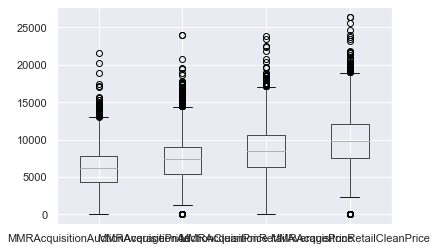

In [324]:
from matplotlib import pyplot as plt

boxplot1 = carvana.boxplot(column=['MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice'])

###### Current

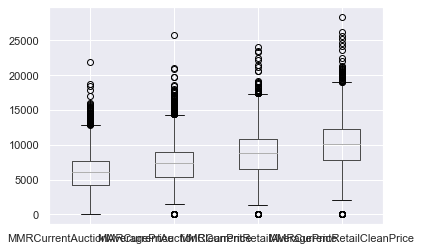

In [325]:
boxplot2 = carvana.boxplot(column=['MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice'])

Kreirajmo korelacionu matricu, kako bi uocili korelacije izmedju varijabli u datasetu:

<AxesSubplot:>

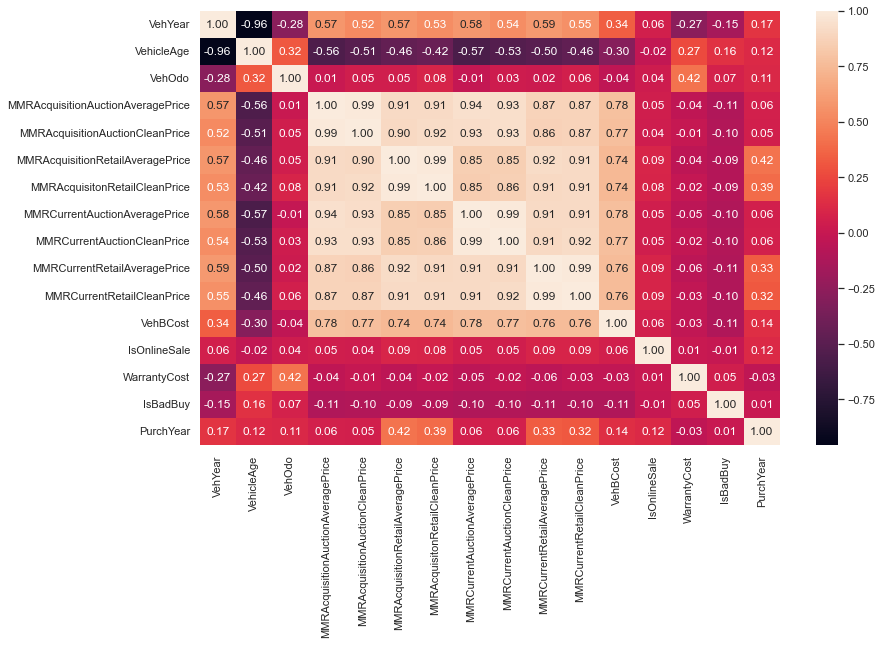

In [326]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

corr_matrix = carvana.select_dtypes(np.number).corr()
plt.figure(figsize=(13,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')

Kako smo uocili velike korelacije izmedju varijabli koje se odnose na cene, odstampajmo scatter plotove izmedju njih:

###### scatterplotovi izmedju Acquisition i Current

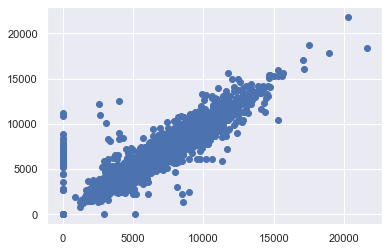

In [327]:

plt.scatter(carvana['MMRAcquisitionAuctionAveragePrice'], carvana['MMRCurrentAuctionAveragePrice'])

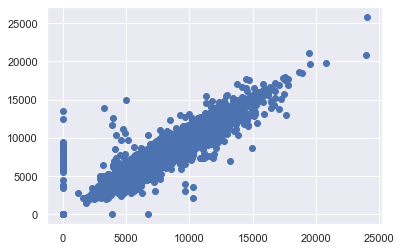

In [328]:
plt.scatter(carvana['MMRAcquisitionAuctionCleanPrice'], carvana['MMRCurrentAuctionCleanPrice'])

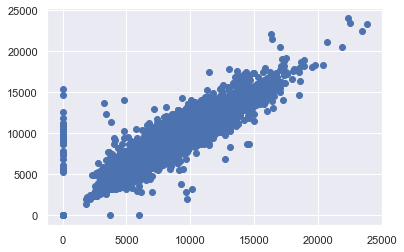

In [329]:
plt.scatter(carvana['MMRAcquisitionRetailAveragePrice'], carvana['MMRCurrentRetailAveragePrice'])

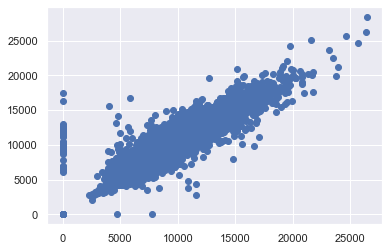

In [330]:
plt.scatter(carvana['MMRAcquisitonRetailCleanPrice'], carvana['MMRCurrentRetailCleanPrice'])

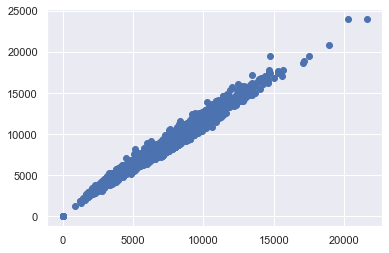

In [331]:
#scatterplotovi unutar Acquisition
plt.scatter(carvana['MMRAcquisitionAuctionAveragePrice'], carvana['MMRAcquisitionAuctionCleanPrice'])

###### scatterplotovi unutar Current

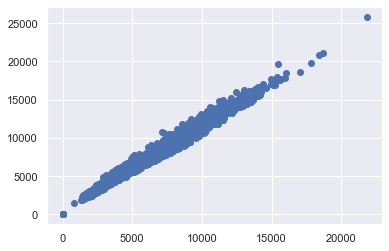

In [332]:
plt.scatter(carvana['MMRCurrentAuctionAveragePrice'], carvana['MMRCurrentAuctionCleanPrice'])

Odstampajmo distribuciju varijable MMRCurrentRetailAveragePrice u odnosu na izlaznu varijablu, kako bi videli da li se distribucija ove cene razlikuje u zavisnosti od toga da li je kupovina losa ili dobra:

C:\Users\Antonije\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Antonije\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Current Retail Avg. Price between Good and Bad Buys')

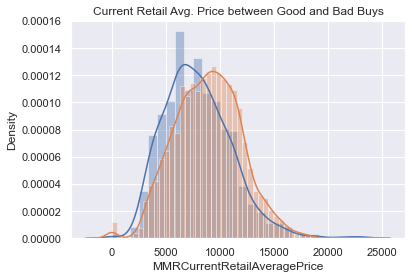

In [333]:
sns.distplot(carvana[carvana['IsBadBuy'] == 1]['MMRCurrentRetailAveragePrice'])
sns.distplot(carvana[carvana['IsBadBuy'] == 0]['MMRCurrentRetailAveragePrice'])
plt.title('Current Retail Avg. Price between Good and Bad Buys')

Preslozimo nas dataframe i postavimo IsBadBuy na mesto poslednje varijable:

In [334]:
IsBadBuy = carvana['IsBadBuy']
carvana2 = carvana.drop(['IsBadBuy'], axis = 1)
carvana2['IsBadBuy'] = IsBadBuy

In [335]:
carvana = carvana2

Izbacujemo ih zbog previse unique vrednosti, kreira se suvise mnogo varijabli prilikom dummy coding-a:

In [336]:
carvana['Model'].value_counts()

PT CRUISER              216
IMPALA                  194
TAURUS                  128
CARAVAN GRAND FWD V6    118
CALIBER                 117
                       ... 
CAMRY V6 3.0L / 3.3L      1
MARINER 2WD 4C            1
SILHOUETTE                1
VERONA                    1
PATRIOT 2WD 4C 2.0L       1
Name: Model, Length: 632, dtype: int64

In [337]:
carvana['SubModel'].value_counts()

4D SEDAN                          1449
4D SEDAN LS                        417
4D SEDAN SE                        359
4D WAGON                           193
4D SUV 4.2L LS                     114
                                  ... 
REG CAB 2.5L XLT                     1
QUAD CAB 3.7L ST                     1
4D EXT CAB 4.0L XL                   1
CREW CAB 3.4L PRERUNNER              1
PASSENGER EXT 3.4L WARNER BROS       1
Name: SubModel, Length: 465, dtype: int64

In [338]:
carvana['Trim'].value_counts()

Bas    1548
LS      921
SE      859
SXT     338
LT      318
       ... 
RT        1
Max       1
Ove       1
ZTW       1
ZX2       1
Name: Trim, Length: 104, dtype: int64

In [339]:
carvana = carvana.drop(['Model', 'SubModel', 'Trim'], axis = 1)

# KONSTRUKCIJA ATRIBUTA

Da bi smanjili suvise velike korelacije izmedju varijabli koje se odnose na cenu, kreiracemo racie, jer ukoliko iskoristimo sve ove varijable u originalnom obliku nece biti u redu, jer sve one objasnjavaju gotovo istu informaciju.

In [340]:
carvana['AcquisitionAuctionRatio'] = carvana['MMRAcquisitionAuctionAveragePrice'] / carvana['MMRAcquisitionAuctionCleanPrice']
carvana['AcquisitionRetailRatio'] = carvana['MMRAcquisitionRetailAveragePrice'] / carvana['MMRAcquisitonRetailCleanPrice']
carvana['CurrentAuctionRatio'] = carvana['MMRCurrentAuctionAveragePrice'] / carvana['MMRCurrentAuctionCleanPrice']
carvana['CurrentRetailRatio'] = carvana['MMRCurrentRetailAveragePrice'] / carvana['MMRCurrentRetailCleanPrice']

carvana['RatioDiffAucAcqCurrAvgPrice'] = carvana['MMRAcquisitionAuctionAveragePrice'] / carvana['MMRCurrentAuctionAveragePrice']
carvana['RatioDiffAucAcqCurrCleanPrice'] = carvana['MMRAcquisitionAuctionCleanPrice'] / carvana['MMRCurrentAuctionCleanPrice']
carvana['RatioDiffRetAcqCurrAvgPrice'] = carvana['MMRAcquisitionRetailAveragePrice'] / carvana['MMRCurrentRetailAveragePrice']
carvana['RatioDiffRetAcqCurrCleanPrice'] = carvana['MMRAcquisitonRetailCleanPrice'] / carvana['MMRCurrentRetailCleanPrice']

carvana['KilometerPerYear'] = carvana['VehOdo'] / carvana['VehicleAge']


Izbacicemo varijable na osnovu kojih smo konstruisali ratio varijable:

In [341]:
carvana = carvana.drop(['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
             'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentRetailAveragePrice', 
             'MMRCurrentRetailCleanPrice', 'MMRCurrentAuctionCleanPrice','VehOdo','VehicleAge'], axis = 1)

Kako je ocigledno bilo deljenja nulom, vrednosti za neke ratio varijable ce biti nule, te je potrebno dopuniti te N/A vrednosti. N/A vrednosti cemo dopuniti medianom, jer ove varijable ne uzimaju normalnu raspodelu:

In [342]:
carvana.loc[carvana['AcquisitionAuctionRatio'].notnull() == False, "AcquisitionAuctionRatio"] = carvana['AcquisitionAuctionRatio'].describe()['50%']
carvana.loc[carvana['AcquisitionRetailRatio'].notnull() == False, "AcquisitionRetailRatio"] = carvana['AcquisitionRetailRatio'].describe()['50%']
carvana.loc[carvana['CurrentAuctionRatio'].notnull() == False, "CurrentAuctionRatio"] = carvana['CurrentAuctionRatio'].describe()['50%']
carvana.loc[carvana['CurrentRetailRatio'].notnull() == False, "CurrentRetailRatio"] = carvana['CurrentRetailRatio'].describe()['50%']

carvana.loc[carvana['RatioDiffAucAcqCurrAvgPrice'].notnull() == False, "RatioDiffAucAcqCurrAvgPrice"] = carvana['RatioDiffAucAcqCurrAvgPrice'].describe()['50%']
carvana.loc[carvana['RatioDiffAucAcqCurrCleanPrice'].notnull() == False, "RatioDiffAucAcqCurrCleanPrice"] = carvana['RatioDiffAucAcqCurrCleanPrice'].describe()['50%']
carvana.loc[carvana['RatioDiffRetAcqCurrAvgPrice'].notnull() == False, "RatioDiffRetAcqCurrAvgPrice"] = carvana['RatioDiffRetAcqCurrAvgPrice'].describe()['50%']
carvana.loc[carvana['RatioDiffRetAcqCurrCleanPrice'].notnull() == False, "RatioDiffRetAcqCurrCleanPrice"] = carvana['RatioDiffRetAcqCurrCleanPrice'].describe()['50%']

carvana.loc[np.isinf(carvana['RatioDiffAucAcqCurrAvgPrice']), "RatioDiffAucAcqCurrAvgPrice"] = carvana['RatioDiffAucAcqCurrAvgPrice'].describe()['50%']
carvana.loc[np.isinf(carvana['RatioDiffAucAcqCurrCleanPrice']), "RatioDiffAucAcqCurrCleanPrice"] = carvana['RatioDiffAucAcqCurrCleanPrice'].describe()['50%']
carvana.loc[np.isinf(carvana['RatioDiffRetAcqCurrAvgPrice']), "RatioDiffRetAcqCurrAvgPrice"] = carvana['RatioDiffRetAcqCurrAvgPrice'].describe()['50%']
carvana.loc[np.isinf(carvana['RatioDiffRetAcqCurrCleanPrice']), "RatioDiffRetAcqCurrCleanPrice"] = carvana['RatioDiffRetAcqCurrCleanPrice'].describe()['50%']



carvana.loc[carvana['KilometerPerYear'].notnull() == False, "KilometerPerYear"] = carvana['KilometerPerYear'].describe()['50%']

Odstampajmo ponovo matricu korelacije, da vidimo jesmo li uspeli da smanjimo te korelacije:

<AxesSubplot:>

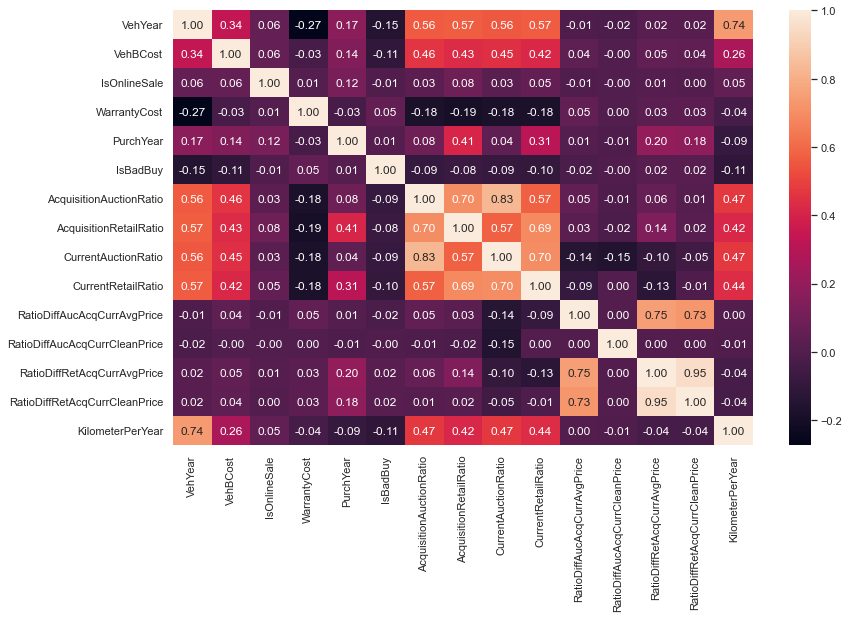

In [343]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

corr_matrix = carvana.select_dtypes(np.number).corr()
plt.figure(figsize=(13,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')

## STANDARDIZACIJA NUMERICKIH I DUMMY CODING KATEGORIJSKIH VARIJABLI

Stavimo u X sve ulazne varijable, a u y izlaznu varijablu:

In [405]:
X = carvana.drop("IsBadBuy", axis = 1)
y = carvana['IsBadBuy']

Sredimo nase podatke pomocu ColumnTransforema-a. Pomocu StandarScaler-a cemo standardizovati sve numericke varijable (ne smemo da ih normalizujemo jer dosta varijabli ima outlier-e), a pomocu OneHotEncoder-a cemo nase kategorijske varijable pretvoriti u dummy varijable, jer nigde nismo nasli smislen poredak u okviru njih, da bi neku recodovali kao ordinalnu.

In [406]:
numerics = X.select_dtypes(np.number).columns
numerics

Index(['VehYear', 'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'PurchYear',
       'AcquisitionAuctionRatio', 'AcquisitionRetailRatio',
       'CurrentAuctionRatio', 'CurrentRetailRatio',
       'RatioDiffAucAcqCurrAvgPrice', 'RatioDiffAucAcqCurrCleanPrice',
       'RatioDiffRetAcqCurrAvgPrice', 'RatioDiffRetAcqCurrCleanPrice',
       'KilometerPerYear'],
      dtype='object')

In [407]:
categorical = X.select_dtypes(object).columns
categorical

Index(['Make', 'Color', 'Transmission', 'WheelType', 'Nationality', 'Size',
       'TopThreeAmericanName'],
      dtype='object')

In [408]:
X.dtypes

VehYear                            int64
Make                              object
Color                             object
Transmission                      object
WheelType                         object
Nationality                       object
Size                              object
TopThreeAmericanName              object
VehBCost                           int32
IsOnlineSale                       int64
WarrantyCost                       int64
PurchYear                          int64
AcquisitionAuctionRatio          float64
AcquisitionRetailRatio           float64
CurrentAuctionRatio              float64
CurrentRetailRatio               float64
RatioDiffAucAcqCurrAvgPrice      float64
RatioDiffAucAcqCurrCleanPrice    float64
RatioDiffRetAcqCurrAvgPrice      float64
RatioDiffRetAcqCurrCleanPrice    float64
KilometerPerYear                 float64
dtype: object

In [409]:
X.max(axis=0)

VehYear                                    2009
Make                                      VOLVO
Color                                    YELLOW
Transmission                             MANUAL
WheelType                                Covers
Nationality                      TOP LINE ASIAN
Size                                        VAN
TopThreeAmericanName                      OTHER
VehBCost                                  19000
IsOnlineSale                                  1
WarrantyCost                               6819
PurchYear                                  2010
AcquisitionAuctionRatio                0.980416
AcquisitionRetailRatio                 0.981216
CurrentAuctionRatio                    0.976185
CurrentRetailRatio                     0.984134
RatioDiffAucAcqCurrAvgPrice            6.100924
RatioDiffAucAcqCurrCleanPrice            6745.0
RatioDiffRetAcqCurrAvgPrice            4.837129
RatioDiffRetAcqCurrCleanPrice          4.213091
KilometerPerYear                        

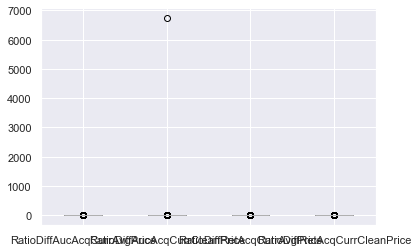

In [410]:
boxplot3 = X.boxplot(column=['RatioDiffAucAcqCurrAvgPrice','RatioDiffAucAcqCurrCleanPrice', 'RatioDiffRetAcqCurrAvgPrice', 'RatioDiffRetAcqCurrCleanPrice'])

In [411]:
X.min(axis=0)

VehYear                              2001
Make                                ACURA
Color                               BEIGE
Transmission                         AUTO
WheelType                           Alloy
Nationality                      AMERICAN
Size                              COMPACT
TopThreeAmericanName             CHRYSLER
VehBCost                             2150
IsOnlineSale                            0
WarrantyCost                          462
PurchYear                            2009
AcquisitionAuctionRatio               0.0
AcquisitionRetailRatio            0.58126
CurrentAuctionRatio                   0.0
CurrentRetailRatio               0.592806
RatioDiffAucAcqCurrAvgPrice           0.0
RatioDiffAucAcqCurrCleanPrice         0.0
RatioDiffRetAcqCurrAvgPrice           0.0
RatioDiffRetAcqCurrCleanPrice         0.0
KilometerPerYear                  2383.75
dtype: object

In [412]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler

In [413]:
numerics = X.select_dtypes(np.number).columns
numeric_transformer = StandardScaler()

categorical = X.select_dtypes(object).columns
categorical_transformer = OneHotEncoder(sparse=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('numbers', numeric_transformer, numerics),
        ('categorical', categorical_transformer, categorical)
    ]
)

preprocessor.fit(X)

ColumnTransformer(transformers=[('numbers', StandardScaler(),
                                 Index(['VehYear', 'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'PurchYear',
       'AcquisitionAuctionRatio', 'AcquisitionRetailRatio',
       'CurrentAuctionRatio', 'CurrentRetailRatio',
       'RatioDiffAucAcqCurrAvgPrice', 'RatioDiffAucAcqCurrCleanPrice',
       'RatioDiffRetAcqCurrAvgPrice', 'RatioDiffRetAcqCurrCleanPrice',
       'KilometerPerYear'],
      dtype='object')),
                                ('categorical', OneHotEncoder(sparse=False),
                                 Index(['Make', 'Color', 'Transmission', 'WheelType', 'Nationality', 'Size',
       'TopThreeAmericanName'],
      dtype='object'))])

In [414]:
[*numerics, *preprocessor.transformers_[1][1].get_feature_names(categorical)]

C:\Users\Antonije\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['VehYear',
 'VehBCost',
 'IsOnlineSale',
 'WarrantyCost',
 'PurchYear',
 'AcquisitionAuctionRatio',
 'AcquisitionRetailRatio',
 'CurrentAuctionRatio',
 'CurrentRetailRatio',
 'RatioDiffAucAcqCurrAvgPrice',
 'RatioDiffAucAcqCurrCleanPrice',
 'RatioDiffRetAcqCurrAvgPrice',
 'RatioDiffRetAcqCurrCleanPrice',
 'KilometerPerYear',
 'Make_ACURA',
 'Make_BUICK',
 'Make_CADILLAC',
 'Make_CHEVROLET',
 'Make_CHRYSLER',
 'Make_DODGE',
 'Make_FORD',
 'Make_GMC',
 'Make_HONDA',
 'Make_HUMMER',
 'Make_HYUNDAI',
 'Make_INFINITI',
 'Make_ISUZU',
 'Make_JEEP',
 'Make_KIA',
 'Make_LEXUS',
 'Make_LINCOLN',
 'Make_MAZDA',
 'Make_MERCURY',
 'Make_MINI',
 'Make_MITSUBISHI',
 'Make_NISSAN',
 'Make_OLDSMOBILE',
 'Make_PLYMOUTH',
 'Make_PONTIAC',
 'Make_SATURN',
 'Make_SCION',
 'Make_SUBARU',
 'Make_SUZUKI',
 'Make_TOYOTA',
 'Make_VOLKSWAGEN',
 'Make_VOLVO',
 'Color_BEIGE',
 'Color_BLACK',
 'Color_BLUE',
 'Color_BROWN',
 'Color_GOLD',
 'Color_GREEN',
 'Color_GREY',
 'Color_MAROON',
 'Color_NOT AVAIL',
 'Color_

In [415]:
X = pd.DataFrame(preprocessor.transform(X), 
             columns=[*numerics, *preprocessor.transformers_[1][1].get_feature_names(categorical)])


C:\Users\Antonije\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [417]:
X.head()

VehYear  VehBCost  IsOnlineSale  WarrantyCost  PurchYear  \
0 -0.191806 -1.065435     -0.166793      0.194455  -1.031687   
1 -0.768751 -1.523737     -0.166793     -1.075463  -1.031687   
2 -0.191806 -1.581025     -0.166793     -0.422936  -1.031687   
3 -0.768751 -0.664420     -0.166793     -1.135696  -1.031687   
4 -0.768751  1.168791     -0.166793     -0.590250  -1.031687   

   AcquisitionAuctionRatio  AcquisitionRetailRatio  CurrentAuctionRatio  \
0                -2.244656               -0.629052            -1.410765   
1                -1.707170               -0.674570            -1.864448   
2                -0.684055                0.650894            -1.184988   
3                -0.367682               -1.387553            -0.136808   
4                -0.352668               -0.375692            -0.242636   

   CurrentRetailRatio  RatioDiffAucAcqCurrAvgPrice  \
0           -0.681319                    -1.325595   
1           -1.236092                     0.109840   
2           -0.080909                     1.209687   
3            0.122449                    -1.110866   
4            0.598443                    -0.700941   

   RatioDiffAucAcqCurrCleanPrice  RatioDiffRetAcqCurrAvgPrice  \
0                      -0.013945                    -0.023969   
1                      -0.012057                     0.574797   
2                      -0.010322                     1.097903   
3                      -0.014119                    -0.980194   
4                      -0.013399                    -0.278519   

   RatioDiffRetAcqCurrCleanPrice  KilometerPerYear  Make_ACURA  Make_BUICK  \
0                      -0.034120         -0.189328         0.0         0.0   
1                       0.372235         -0.690893         0.0         0.0   
2                       0.847932         -0.293814         0.0         0.0   
3                      -0.474704         -0.400272         0.0         0.0   
4                       0.094921         -0.492163         0.0         0.0   

   Make_CADILLAC  Make_CHEVROLET  Make_CHRYSLER  Make_DODGE  Make_FORD  \
0            0.0             0.0            0.0         1.0        0.0   
1            0.0             0.0            0.0         1.0        0.0   
2            0.0             0.0            0.0         0.0        1.0   
3            0.0             0.0            0.0         0.0        0.0   
4            0.0             0.0            0.0         1.0        0.0   

   Make_GMC  Make_HONDA  Make_HUMMER  Make_HYUNDAI  Make_INFINITI  Make_ISUZU  \
0       0.0         0.0          0.0           0.0            0.0         0.0   
1       0.0         0.0          0.0           0.0            0.0         0.0   
2       0.0         0.0          0.0           0.0            0.0         0.0   
3       0.0         0.0          0.0           0.0            0.0         0.0   
4       0.0         0.0          0.0           0.0            0.0         0.0   

   Make_JEEP  Make_KIA  Make_LEXUS  Make_LINCOLN  Make_MAZDA  Make_MERCURY  \
0        0.0       0.0         0.0           0.0         0.0           0.0   
1        0.0       0.0         0.0           0.0         0.0           0.0   
2        0.0       0.0         0.0           0.0         0.0           0.0   
3        0.0       0.0         0.0           0.0         0.0           0.0   
4        0.0       0.0         0.0           0.0         0.0           0.0   

   Make_MINI  Make_MITSUBISHI  Make_NISSAN  Make_OLDSMOBILE  Make_PLYMOUTH  \
0        0.0              0.0          0.0              0.0            0.0   
1        0.0              0.0          0.0              0.0            0.0   
2        0.0              0.0          0.0              0.0            0.0   
3        0.0              1.0          0.0              0.0            0.0   
4        0.0              0.0          0.0              0.0            0.0   

   Make_PONTIAC  Make_SATURN  Make_SCION  Make_SUBARU  Make_SUZUKI  \
0           0.0          0.0         0.0   

Sacuvajmo sredjenu bazu:

In [418]:
final_data = X
final_data['IsBadBuy'] = y

out_csv = 'final_data.csv'
final_data.to_csv(out_csv)